In [193]:
import mdptoolbox.example
import numpy as np
import matplotlib.pyplot as plt
import gym
import pandas as pd
import seaborn as sns

In [75]:
def plot(label, x_axis, x_label, y_axis, y_label):
    plt.plot(x_axis,y_axis)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(label + x_label+ ' vs ' + y_label + ' Analysis')
    plt.grid()
    plt.show()

In [82]:
def policy_iteration(P, R, discounts=[], label='Missing label'):
    pi = pd.DataFrame(columns={"iteration", "value_function", "policy", "time", "discount"})
    iterations = [0] * len(discounts)
    value_functions = [0] * len(discounts)
    policies = [0] * len(discounts)
    time = [0] * len(discounts)
    
    for iteration in range(0,len(discounts)):
        policy_iter = mdptoolbox.mdp.PolicyIteration(P, R, discounts[iteration])
        policy_iter.run()
        value_functions[iteration] = np.mean(policy_iter.V)
        policies[iteration] = policy_iter.policy
        time[iteration] = policy_iter.time
        iterations[iteration] = policy_iter.iter
        
    plot(label+ '\'s Policy Iteration: ', discounts, 'Discounts', iterations, 'Convergence') 
    
    plot(label+ '\'s Policy Iteration: ', discounts, 'Discounts', value_functions, 'Average Rewards(value functions)') 
                
    plot(label+ '\'s Policy Iteration: ',  discounts, 'Discounts', time, 'Time') 
    
    plot(label+ '\'s Policy Iteration: ', iterations, 'Iterations', time, 'Time') 
    
    plot(label+ '\'s Policy Iteration: ', iterations, 'Iterations', value_functions, 'Average Rewards(value functions)') 
    
    return value_functions, policies, time


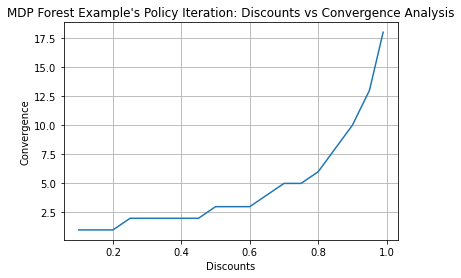

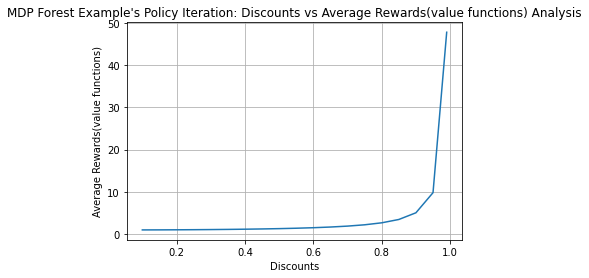

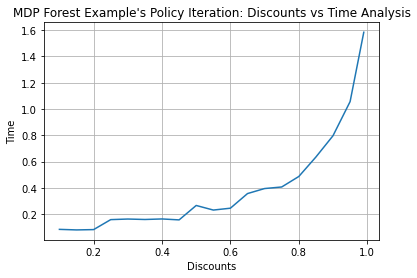

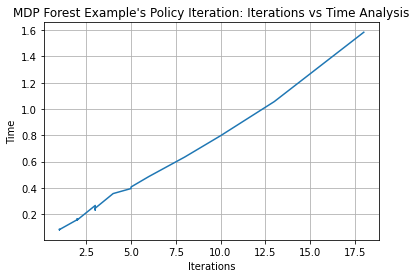

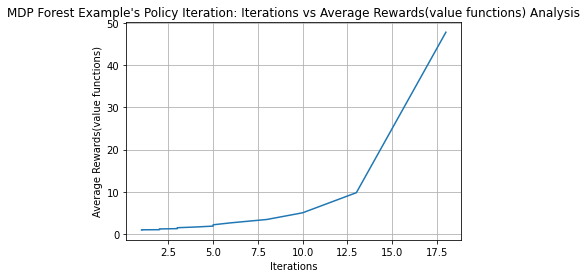

In [83]:
P, R = mdptoolbox.example.forest(S=2000)
v_f, p, t = policy_iteration(P, R, [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], "MDP Forest Example")

In [100]:
ai = 0
visual = ""
myaction = ""
for action in p[-1]:
    ai+=1
    myaction = "Cut; " if (action==0)  else "Wait; "
    visual += "Tree "+str(ai)+" - "+myaction

print(visual)

Tree 1 - Cut; Tree 2 - Wait; Tree 3 - Wait; Tree 4 - Wait; Tree 5 - Wait; Tree 6 - Wait; Tree 7 - Wait; Tree 8 - Wait; Tree 9 - Wait; Tree 10 - Wait; Tree 11 - Wait; Tree 12 - Wait; Tree 13 - Wait; Tree 14 - Wait; Tree 15 - Wait; Tree 16 - Wait; Tree 17 - Wait; Tree 18 - Wait; Tree 19 - Wait; Tree 20 - Wait; Tree 21 - Wait; Tree 22 - Wait; Tree 23 - Wait; Tree 24 - Wait; Tree 25 - Wait; Tree 26 - Wait; Tree 27 - Wait; Tree 28 - Wait; Tree 29 - Wait; Tree 30 - Wait; Tree 31 - Wait; Tree 32 - Wait; Tree 33 - Wait; Tree 34 - Wait; Tree 35 - Wait; Tree 36 - Wait; Tree 37 - Wait; Tree 38 - Wait; Tree 39 - Wait; Tree 40 - Wait; Tree 41 - Wait; Tree 42 - Wait; Tree 43 - Wait; Tree 44 - Wait; Tree 45 - Wait; Tree 46 - Wait; Tree 47 - Wait; Tree 48 - Wait; Tree 49 - Wait; Tree 50 - Wait; Tree 51 - Wait; Tree 52 - Wait; Tree 53 - Wait; Tree 54 - Wait; Tree 55 - Wait; Tree 56 - Wait; Tree 57 - Wait; Tree 58 - Wait; Tree 59 - Wait; Tree 60 - Wait; Tree 61 - Wait; Tree 62 - Wait; Tree 63 - Wait; Tr

In [106]:
pi_visual_policy = np.zeros((40, 50))
row=0
column = 0
for action in p[-1]:
    if(row>39):
        row = 0
        column+=1
    
    pi_visual_policy[row][column] = action
    row+=1
pd.DataFrame(pi_visual_policy).to_csv("pi_policy.csv")

In [120]:
pi_visual_policy_2 = np.zeros((40, 50))
row=0
column = 0
for action in p[0]:
    if(row>39):
        row = 0
        column+=1
    
    pi_visual_policy_2[row][column] = action
    row+=1

In [121]:
pd.DataFrame(pi_visual_policy_2).to_csv("pi_policy_2.csv")

In [123]:
def value_iteration(P, R, discounts=[], epsilons=[],  label='Missing label'):
    iterations = [0] * len(discounts)
    value_functions = [0] * len(discounts)
    policies = [0] * len(discounts)
    time = [0] * len(discounts)
    
    for iteration in range(0,len(discounts)):
        policy_iter = mdptoolbox.mdp.ValueIteration(P, R, discounts[iteration])
        policy_iter.run()
        value_functions[iteration] = np.mean(policy_iter.V)
        policies[iteration] = policy_iter.policy
        time[iteration] = policy_iter.time
        iterations[iteration] = policy_iter.iter
        
    plot(label+ '\'s Value Iteration: ', discounts, 'Discounts', iterations, 'Convergence') 
    
    plot(label+ '\'s Value Iteration: ', discounts, 'Discounts', value_functions, 'Average Rewards(value functions)') 

    plot(label+ '\'s Value Iteration: ', discounts, 'Discounts', time, 'Time') 
    
    plot(label+ '\'s Value Iteration: ', iterations, 'Iterations', time, 'Time') 
    
    plot(label+ '\'s Value Iteration: ', iterations, 'Iterations', value_functions, 'Average Rewards(value functions)') 

    iterations_e = [0] * len(discounts)
    value_functions_e = [0] * len(epsilons)
    policies_e = [0] * len(epsilons)
    time_e = [0] * len(epsilons)
    
    for iteration in range(0,len(epsilons)):
        policy_iter = mdptoolbox.mdp.ValueIteration(P, R, discount=0.99, epsilon=epsilons[iteration])
        policy_iter.run()
        value_functions_e[iteration] = np.mean(policy_iter.V)
        policies_e[iteration] = policy_iter.policy
        time_e[iteration] = policy_iter.time
        iterations_e[iteration] = policy_iter.iter
        
    plot(label+ '\'s Value Iteration: ', epsilons, 'Epsilon', iterations_e, 'Convergence') 
    
    plot(label+ '\'s Value Iteration: ', epsilons, 'Epsilon', value_functions_e, 'Average Rewards(value functions)') 
        
    plot(label+ '\'s Value Iteration: ', epsilons, 'Epsilon',  time_e, 'Time') 

    plot(label+ '\'s Value Iteration: ', iterations_e, 'Iterations', time_e, 'Time') 
    
    plot(label+ '\'s Value Iteration: ', iterations_e, 'Iterations', value_functions_e, 'Average Rewards(value functions)') 
    
    return value_functions, policies, time, value_functions_e, policies_e, time_e


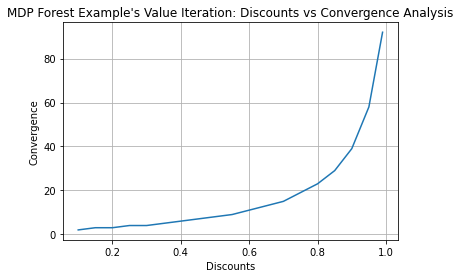

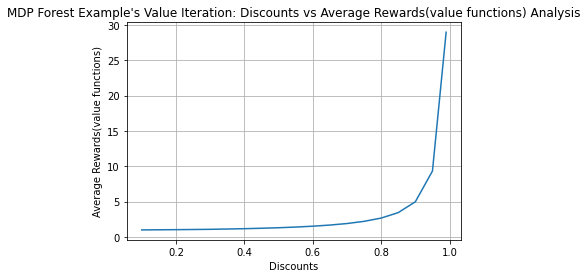

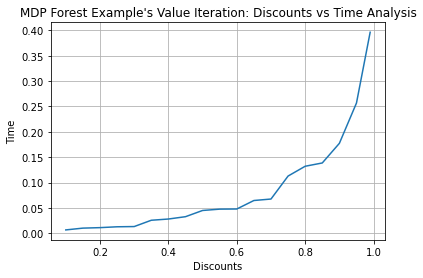

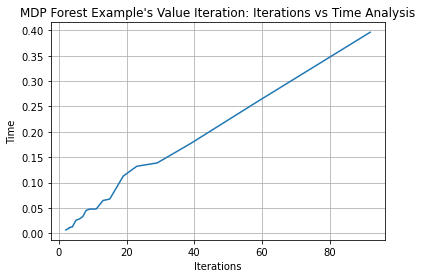

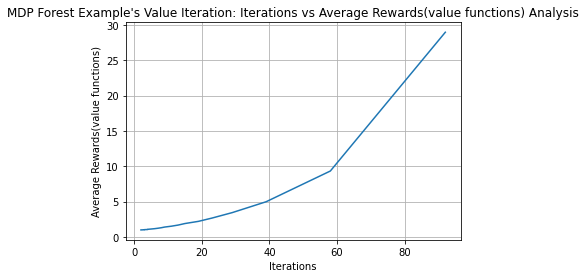

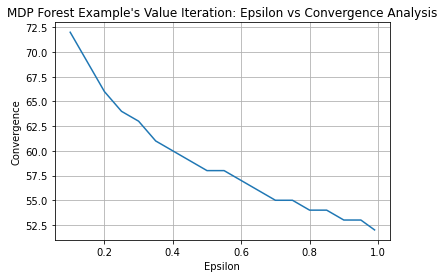

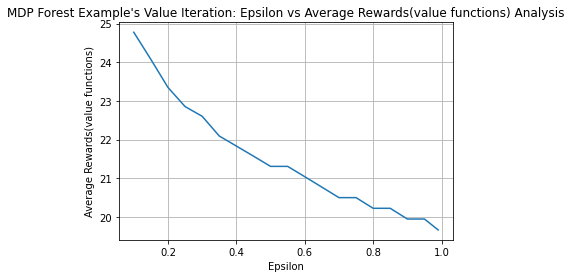

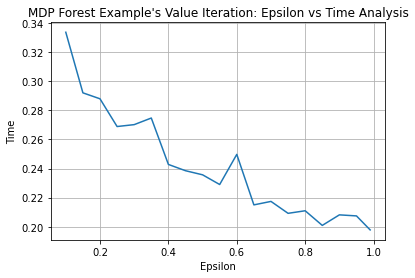

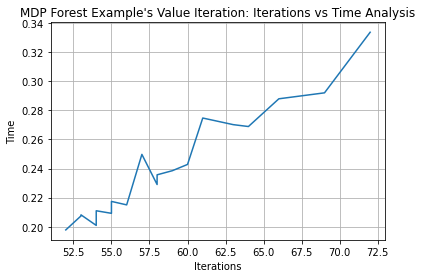

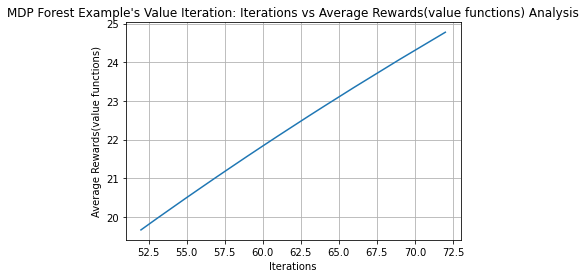

In [124]:
P, R = mdptoolbox.example.forest(S=2000)
v_f_, p_, t_, v_f_e, p_e, t_e = value_iteration(P, R, [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], "MDP Forest Example")

In [125]:
pi_visual_value = np.zeros((40, 50))
row=0
column = 0
for action in p_e[0]:
    if(row>39):
        row = 0
        column+=1
    
    pi_visual_value[row][column] = action
    row+=1
pd.DataFrame(pi_visual_value).to_csv("pi_visual.csv")

In [126]:
pi_visual_value_2 = np.zeros((40, 50))
row=0
column = 0
for action in p_e[-1]:
    if(row>39):
        row = 0
        column+=1
    
    pi_visual_value_2[row][column] = action
    row+=1
pd.DataFrame(pi_visual_value_2).to_csv("pi_visual_2.csv")

In [119]:
#class mdptoolbox.mdp.PolicyIteration(transitions, reward, discount, policy0=None, max_iter=1000, eval_type=0, skip_check=False)
#class mdptoolbox.mdp.ValueIteration(transitions, reward, discount, epsilon=0.01, max_iter=1000, initial_value=0, skip_check=False)


array([0.1, 0. , 0. , ..., 0. , 0. , 0. ])

In [127]:
def q_learning(P, R, discounts=[], epsilons=[],  label='Missing label'):
    iterations = [10000] * len(discounts)
    value_functions = [0] * len(discounts)
    policies = [0] * len(discounts)
    time = [0] * len(discounts)
    
    for iteration in range(0,len(discounts)):
        policy_iter = mdptoolbox.mdp.QLearning(P, R, discounts[iteration])
        policy_iter.run()
        value_functions[iteration] = np.mean(policy_iter.V)
        policies[iteration] = policy_iter.policy
        time[iteration] = policy_iter.time
        
        
#     plot(label+ '\'s q_learning: ', discounts, 'Discounts', iterations, 'Convergence') 
    
    plot(label+ '\'s q_learning: ', discounts, 'Discounts', value_functions, 'Average Rewards(value functions)') 

    plot(label+ '\'s q_learning: ', discounts, 'Discounts', time, 'Time') 
    
#     plot(label+ '\'s q_learning: ', iterations, 'Iterations', time, 'Time') 
    
#     plot(label+ '\'s q_learning: ', iterations, 'Iterations', value_functions, 'Average Rewards(value functions)') 

    iterations = range(0, len(epsilons))
    value_functions_e = [0] * len(epsilons)
    policies_e = [0] * len(epsilons)
    time_e = [0] * len(epsilons)
    
#     for iteration in range(0,len(epsilons)):
#         policy_iter = mdptoolbox.mdp.ValueIteration(P, R, discount=0.1, epsilon=epsilons[iteration])
#         policy_iter.run()
#         value_functions_e[iteration] = np.mean(policy_iter.V)
#         policies_e[iteration] = policy_iter.policy
#         time_e[iteration] = policy_iter.time
        
#     plot(label+ '\'s Value Iteration: ', epsilons, 'Epsilon', iterations, 'Convergence') 
    
#     plot(label+ '\'s Value Iteration: ', epsilons, 'Epsilon', value_functions_e, 'Average Rewards(value functions)') 
        
#     plot(label+ '\'s Value Iteration: ', iterations, 'Iterations', time_e, 'Time') 
    
#     plot(label+ '\'s Value Iteration: ', iterations, 'Iterations', value_functions_e, 'Average Rewards(value functions)') 
    
    return value_functions, policies, time, value_functions_e, policies_e, time_e



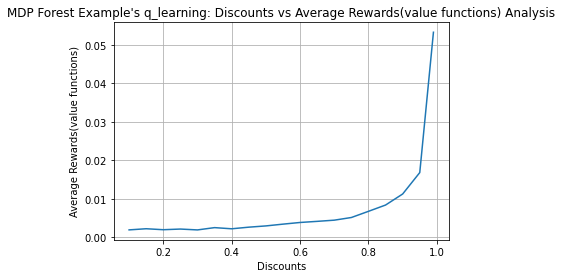

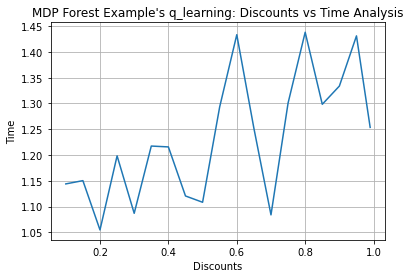

In [128]:
P, R = mdptoolbox.example.forest(S=2000)
v_f_, p_, t_, v_f_e, p_e, t_e = q_learning(P, R, [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], "MDP Forest Example")

In [129]:
pi_visual_q = np.zeros((40, 50))
row=0
column = 0
for action in p_[-1]:
    if(row>39):
        row = 0
        column+=1
    
    pi_visual_q[row][column] = action
    row+=1
pd.DataFrame(pi_visual_q).to_csv("pi_visual_q.csv")

In [130]:
env = gym.make("FrozenLake-v0", is_slippery = True)
env.reset()
env.render()

states = env.observation_space.n
actions = env.action_space.n

fl_P = np.zeros((actions, states, states))
fl_R = np.zeros((states, actions))

for state in env.env.P:
    for action in env.env.P[state]:
        for opt in env.env.P[state][action]:
            fl_P[action][state][opt[1]] += opt[0]
            fl_R[state][action] += opt[2]


SFFF
FHFH
FFFH
HFFG


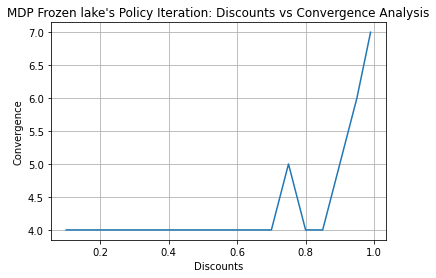

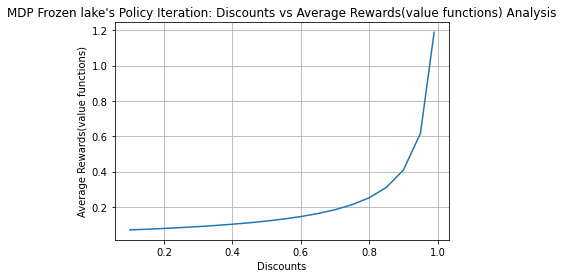

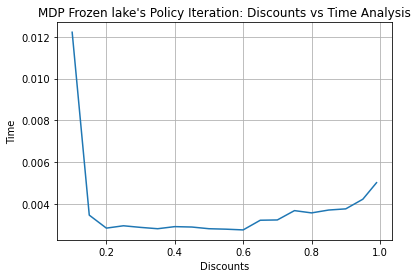

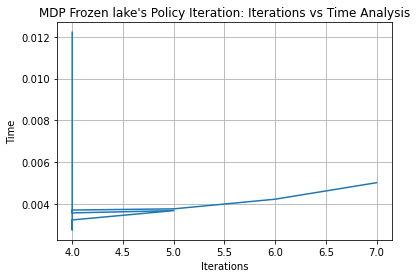

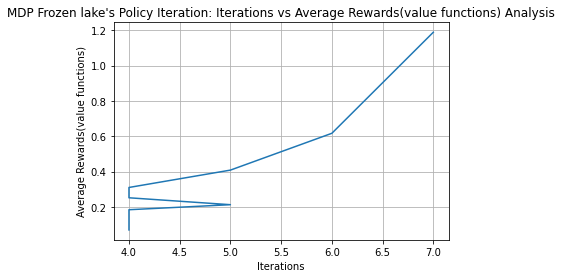

In [131]:
fl_v_f, fl_p, fl_t = policy_iteration(fl_P, fl_R, [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], "MDP Frozen lake")

In [176]:
# fl_pi_visual_policy = np.zeros((4, 4))
# row=0
# column = 0
# for action in fl_p[-1]:
#     if(column>3):
#         row+=1
#         column=0
    
#     fl_pi_visual_policy[row][column] = action
#     column+=1
# pd.DataFrame(fl_pi_visual_policy).to_csv("fl_pi_policy.csv")
# fl_pi_visual_policy

In [180]:
def format_policy(fl_policy):
    format_visual_policy = np.array(list(fl_policy)).reshape(4,4).astype(str)

    format_visual_policy[format_visual_policy=='0'] = '←'
    format_visual_policy[format_visual_policy=='1'] = '↓'
    format_visual_policy[format_visual_policy=='2'] = '→'
    format_visual_policy[format_visual_policy=='3'] = '↑'
    return format_visual_policy
# pd.DataFrame(fl_pi_visual_policy).to_csv("fl_pi_policy.csv")

In [173]:
fl_pi_visual_policy = format_policy(fl_p[-1])

In [184]:
# fl_pi_visual_policy_value = np.array(list(fl_v_f[-1])).reshape(4,4).astype(str)

# fl_pi_visual_policy_value
def plot_fl_policy(fl_pol, label="Policy Iteration"):
    fl_policy_viz = (np.asarray(fl_pol.flatten())).reshape(4,4)
    data = np.array([
    [0, 5, 5, 5],
    [5, -10, 5, -10],
    [5, 5, 5, -10],
    [-10, 5, 5, 10]])
    def colors_lake():
        return {
            'S': 'green',
            'F': 'skyblue', 
            'H': 'black', 
            'G': 'gold',
        }

    plt.figure(figsize=(4,4))
    plt.title(label+" Policy visualizaiton ")
    sns.heatmap(data,   annot=fl_policy_viz,  fmt="")

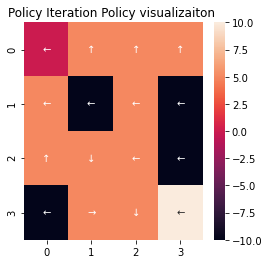

In [175]:
plot_fl_policy(fl_pi_visual_policy)

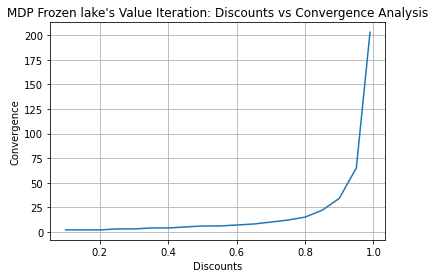

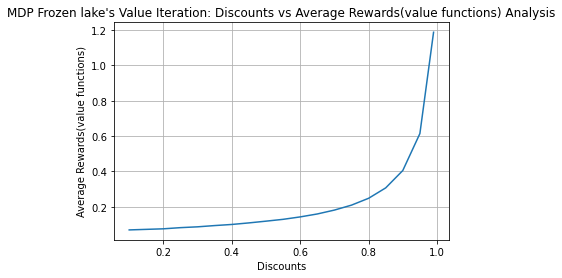

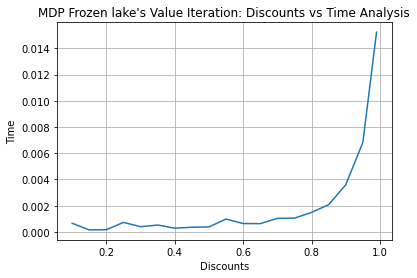

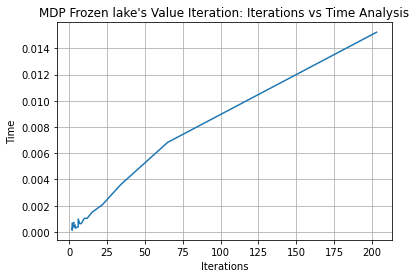

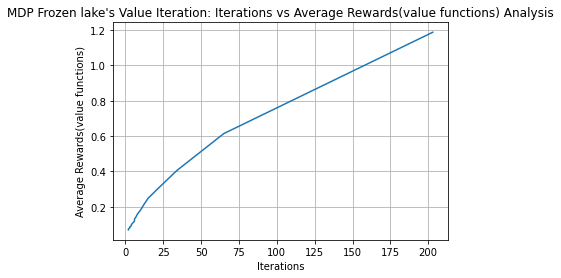

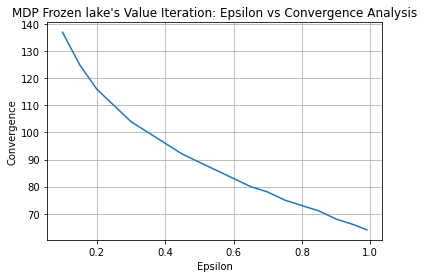

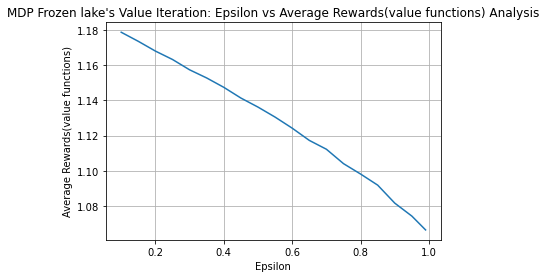

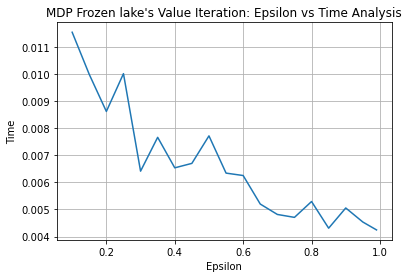

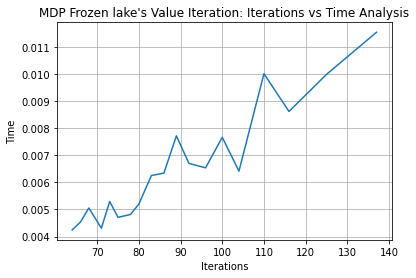

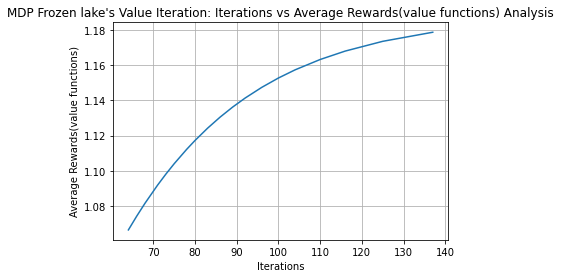

In [185]:
fl_v_f_, fl_p_, fl_t_, fl_v_f_e, fl_p_e, fl_t_e = value_iteration(fl_P, fl_R, [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], "MDP Frozen lake")

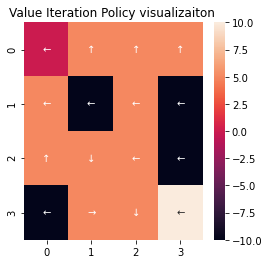

In [187]:
fl_pi_visual_value = format_policy(fl_p_e[0])
plot_fl_policy(fl_pi_visual_value, "Value Iteration")

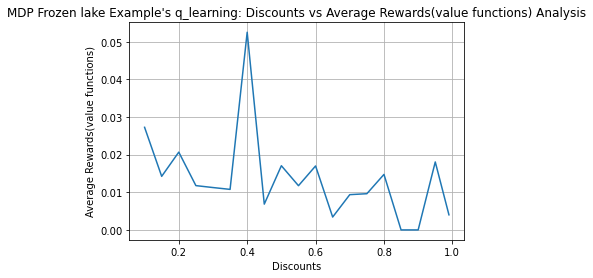

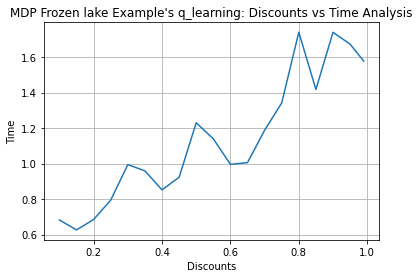

In [188]:
fl_v_f_, fl_p_, fl_t_, fl_v_f_e, fl_p_e, fl_t_e = q_learning(fl_P, fl_R, [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], "MDP Frozen lake Example")


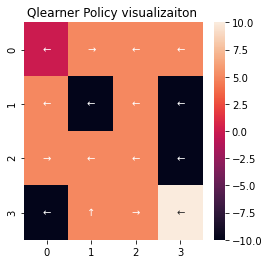

In [192]:
fl_pi_visual_q = format_policy(fl_p_[6])
plot_fl_policy(fl_pi_visual_q, "Qlearner")

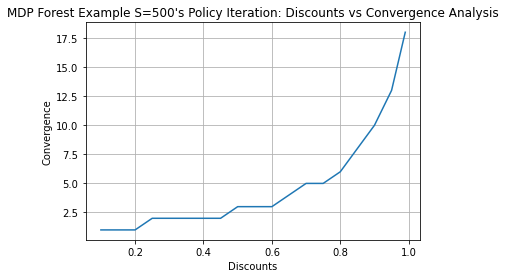

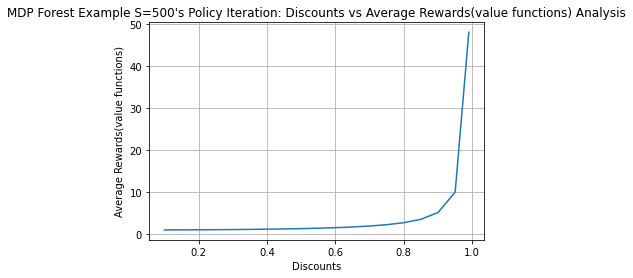

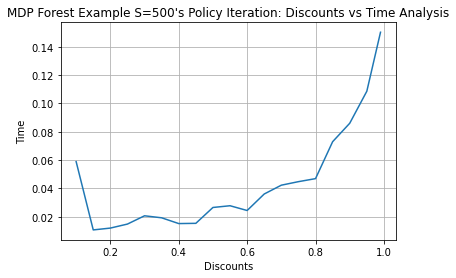

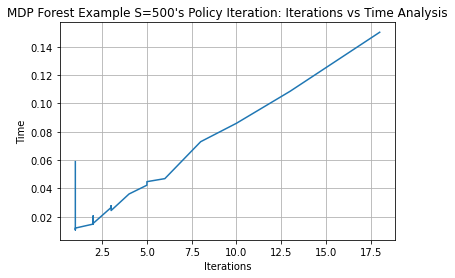

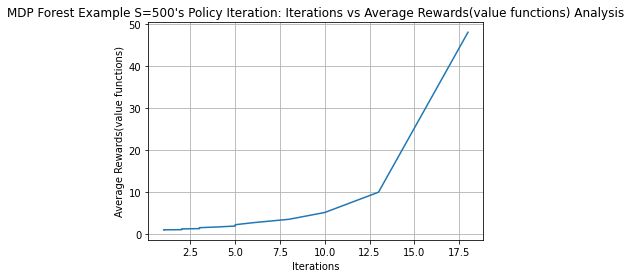

In [194]:
P_500, R_500 = mdptoolbox.example.forest(S=500)
v_f_500, p_500, t_500 = policy_iteration(P_500, R_500, [0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 0.99], "MDP Forest Example S=500")

In [198]:
pi_visual_policy_500 = np.zeros((25, 20))
row=0
column = 0
for action in p_500[-1]:
    if(row>24):
        row = 0
        column+=1
    
    pi_visual_policy_500[row][column] = action
    row+=1
pd.DataFrame(pi_visual_policy_500).to_csv("pi_policy_500.csv")